In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Common import *

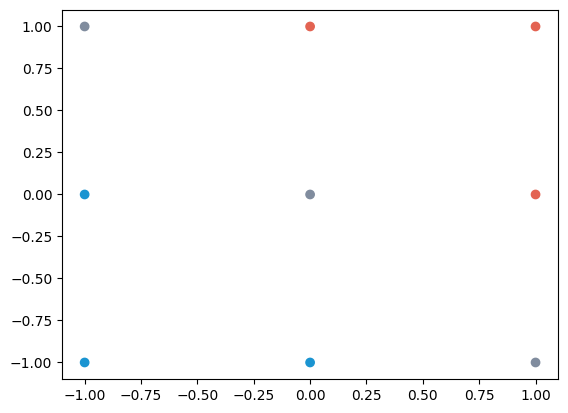

In [2]:
plt.scatter(input[:, 0], input[:, 1], c=expected, cmap=cmap)

In [3]:
W0 = np.array([[0.61275508, 0.98539237, 0.27266151],
               [-0.47399039, 0.66266751, -0.72721264]])
W1 = np.array([[0.96787958],
               [-0.80183257],
               [0.94478099]])

In [21]:
def run(i):
  hidden = np.matmul(i, W0)
  out = np.matmul(hidden, W1)
  return (out.squeeze(), hidden)

In [23]:
out, hidden = run(input)
loss = abs(out - expected).sum()
loss

#np.column_stack([out, expected])

15.94190645227356

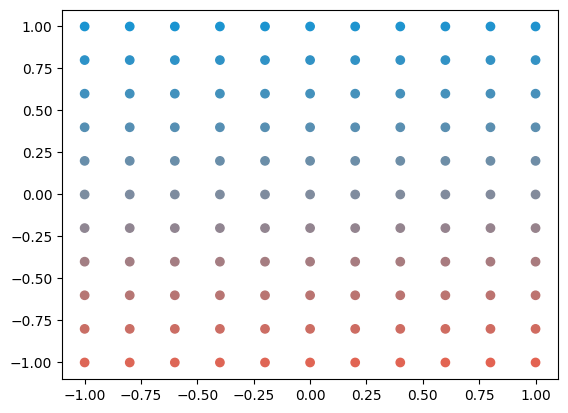

In [6]:
plt.scatter(test[:, 0], test[:, 1], c=run(test)[0].squeeze(), cmap=cmap)

In [30]:
dLdW1 = (np.matmul(np.sign(out - expected), hidden))
#dLdW1 = (np.sign(out.squeeze() - expected) * hidden.T).sum(axis=1)
dLdW1

dHdW0 = input

#dLdW0 = input * W1
#dLdW0

f = lambda i: np.outer(i, W1)
vecF = np.vectorize(f, signature='(m)->(m,n)')

outerProd = vecF(input)
outerProd
outerProd.sum(axis=0)

array([ 1.61843218, -5.9467898 ,  3.81795282])

array([[[-0.96787958,  0.80183257, -0.94478099],
        [ 0.96787958, -0.80183257,  0.94478099]],

       [[ 0.        , -0.        ,  0.        ],
        [ 0.96787958, -0.80183257,  0.94478099]],

       [[ 0.96787958, -0.80183257,  0.94478099],
        [ 0.96787958, -0.80183257,  0.94478099]],

       [[-0.96787958,  0.80183257, -0.94478099],
        [ 0.        , -0.        ,  0.        ]],

       [[ 0.        , -0.        ,  0.        ],
        [ 0.        , -0.        ,  0.        ]],

       [[ 0.96787958, -0.80183257,  0.94478099],
        [ 0.        , -0.        ,  0.        ]],

       [[-0.96787958,  0.80183257, -0.94478099],
        [-0.96787958,  0.80183257, -0.94478099]],

       [[ 0.        , -0.        ,  0.        ],
        [-0.96787958,  0.80183257, -0.94478099]],

       [[ 0.96787958, -0.80183257,  0.94478099],
        [-0.96787958,  0.80183257, -0.94478099]]])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.22044605e-16, 2.22044605e-16]])

In [9]:
e = 1e-2
W0 -= e * dLdW0
W1 -= (e * dLdW1).reshape(3, 1)

W0
W1

NameError: name 'dLdW0' is not defined